In [1]:
# For inline graphs
%matplotlib inline

## Imports

# pandas, numpy
import pandas as pd
import numpy as np

# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn import svm

# Matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Missingno
import missingno as mno

In [2]:
# Load the different files
df_marketing = pd.DataFrame(pd.read_csv('../input/Marketing.csv', encoding="ISO-8859-1"))
#df_immatriculations = pan.DataFrame(pan.read_csv('../input/Immatriculations.csv', encoding="ISO-8859-1"))
df_clients = pd.DataFrame(pd.read_csv('../input/Clients_0.csv', encoding="ISO-8859-1"))
#df_catalogue = pan.DataFrame(pan.read_csv('../input/Catalogue.csv', encoding="ISO-8859-1"))

df_clients.dtypes

age                   object
sexe                  object
taux                  object
situationFamiliale    object
nbEnfantsAcharge      object
2eme voiture          object
immatriculation       object
dtype: object

In [3]:
df_clients.shape

(100000, 7)

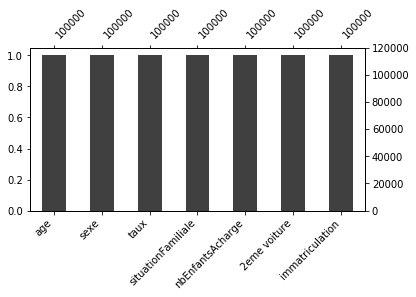

In [4]:
## Check missing data for each DF
##mno.bar(df=df_marketing, figsize=(6, 3), fontsize=10)
mno.bar(df=df_clients, figsize=(6, 3), fontsize=10)
#mno.bar(df=df_catalogue, figsize=(6, 3), fontsize=10)
#mno.bar(df=df_immatriculations, figsize=(6, 3), fontsize=10)

# See no NaN data in the 4 datasets, nice BUT there is : '?', 'N/D', ' ' hard written in it

In [5]:
df_clients['sexe'] = df_clients['sexe'].replace(['M', 'Homme', 'Masculin'], "Homme")
df_clients['sexe'] = df_clients['sexe'].replace(['F', 'Féminin', 'Femme'], "Femme")
df_clients['sexe'] = df_clients['sexe'].replace(['?', 'N/D', ' '], np.nan)

dfSexeClients = pd.get_dummies(df_clients['sexe'])
df_clients = pd.concat([df_clients, dfSexeClients], axis=1).drop(['sexe'] , axis=1)

df_clients.head()

,age,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme
0,44,476,En Couple,0,false,3176 TS 67,0,1
1,20,422,En Couple,2,false,3721 QS 49,0,1
2,49,221,Célibataire,0,false,9099 UV 26,1,0
3,57,246,Célibataire,0,false,3563 LA 55,0,1
4,58,1149,Célibataire,0,false,6963 AX 34,0,1


In [6]:
df_clients['situationFamiliale'] = df_clients['situationFamiliale'].replace(['Célibataire', 'Seule', 'Seul', '?', ' ', 'Divorcée', 'N/D'], "Célibataire")

dfSituationFamillialeClients = pd.get_dummies(df_clients['situationFamiliale'])
df_clients = pd.concat([df_clients, dfSituationFamillialeClients], axis=1).drop(['situationFamiliale'] , axis=1)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,false,3176 TS 67,0,1,0,1,0
1,20,422,2,false,3721 QS 49,0,1,0,1,0
2,49,221,0,false,9099 UV 26,1,0,1,0,0
3,57,246,0,false,3563 LA 55,0,1,1,0,0
4,58,1149,0,false,6963 AX 34,0,1,1,0,0


In [7]:
df_clients['2eme voiture'] = df_clients['2eme voiture'].replace(['true'], 1)
df_clients['2eme voiture'] = df_clients['2eme voiture'].replace(['false', ' ', '?'], 0)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,0,3176 TS 67,0,1,0,1,0
1,20,422,2,0,3721 QS 49,0,1,0,1,0
2,49,221,0,0,9099 UV 26,1,0,1,0,0
3,57,246,0,0,3563 LA 55,0,1,1,0,0
4,58,1149,0,0,6963 AX 34,0,1,1,0,0


In [8]:
#df_clients['immatriculation_num'] = df_clients['immatriculation'].apply(lambda x : x.split(' ')[2]).astype(np.int64)
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,0,3176 TS 67,0,1,0,1,0
1,20,422,2,0,3721 QS 49,0,1,0,1,0
2,49,221,0,0,9099 UV 26,1,0,1,0,0
3,57,246,0,0,3563 LA 55,0,1,1,0,0
4,58,1149,0,0,6963 AX 34,0,1,1,0,0


In [9]:
df_clients['nbEnfantsAcharge'] = df_clients['nbEnfantsAcharge'].replace(['-1', ' ', '?'], '0').astype(int)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,0,3176 TS 67,0,1,0,1,0
1,20,422,2,0,3721 QS 49,0,1,0,1,0
2,49,221,0,0,9099 UV 26,1,0,1,0,0
3,57,246,0,0,3563 LA 55,0,1,1,0,0
4,58,1149,0,0,6963 AX 34,0,1,1,0,0


In [10]:
# Little function to check if there something else than ints in the object types as ' ' or '?' etc
def checkIfInt(s):
    try: 
        int(s)
        return 
    except ValueError:
        print(s)
        return 

In [11]:
dfTauxClients = df_clients[((df_clients.taux != ' ') & (df_clients.taux != '?') & (df_clients.taux != '-1'))]
meanTauxClients = dfTauxClients.taux.astype(np.float64).mean()

df_clients['taux'] = df_clients['taux'].replace([' ', '?', '-1'], meanTauxClients)
df_clients['taux'] = df_clients['taux'].astype(np.float64)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,3176 TS 67,0,1,0,1,0
1,20,422.0,2,0,3721 QS 49,0,1,0,1,0
2,49,221.0,0,0,9099 UV 26,1,0,1,0,0
3,57,246.0,0,0,3563 LA 55,0,1,1,0,0
4,58,1149.0,0,0,6963 AX 34,0,1,1,0,0


In [12]:
dfAgeClients = df_clients[((df_clients.age != ' ') & (df_clients.age != '?') & (df_clients.age != '-1'))]
meanAgeClients = dfAgeClients.age.astype(np.int64).mean()

df_clients['age'] = df_clients['age'].replace([' ', '?', '-1'], meanAgeClients)
df_clients['age'] = df_clients['age'].astype(np.int64)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,3176 TS 67,0,1,0,1,0
1,20,422.0,2,0,3721 QS 49,0,1,0,1,0
2,49,221.0,0,0,9099 UV 26,1,0,1,0,0
3,57,246.0,0,0,3563 LA 55,0,1,1,0,0
4,58,1149.0,0,0,6963 AX 34,0,1,1,0,0


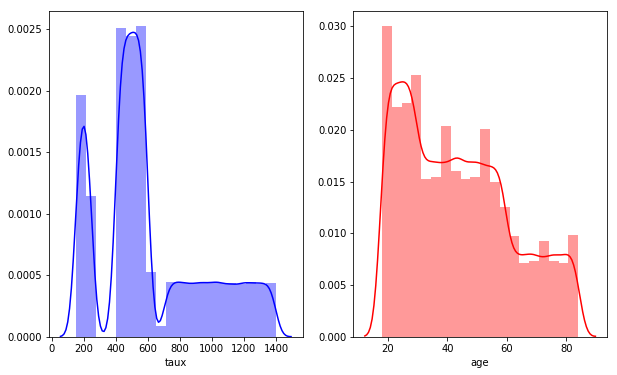

In [13]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax1,ax2 = ax.flatten()
sns.distplot(df_clients['taux'],bins=20,ax=ax1,color='b')
sns.distplot(df_clients['age'],bins=20,ax=ax2,color='r')
plt.show()

In [14]:
df_imma_copy = df_clients['immatriculation'].copy()
df_clients = df_clients.drop(['immatriculation'] , axis=1)
df_clients.head(5)

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,0,1,0,1,0
1,20,422.0,2,0,0,1,0,1,0
2,49,221.0,0,0,1,0,1,0,0
3,57,246.0,0,0,0,1,1,0,0
4,58,1149.0,0,0,0,1,1,0,0


In [15]:
df_clients.describe()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,43.710880,609.807481,1.25189,0.130750,0.297490,0.699420,0.353500,0.63994,0.006560
std,18.216331,334.599826,1.39054,0.337128,0.457156,0.458513,0.478059,0.48002,0.080728
min,18.000000,150.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,28.000000,422.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,42.000000,523.000000,1.00000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000
75%,56.000000,826.000000,2.00000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000
max,84.000000,1399.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000002BA9274C18>], dtype=object)

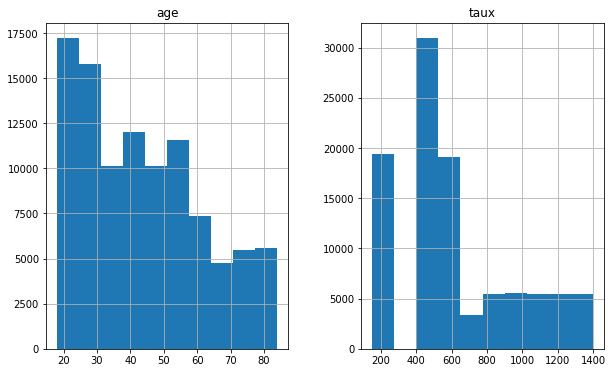

In [16]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax1,ax2 = ax.flatten()

df_clients.hist(column="age", ax=ax1)
df_clients.hist(column="taux", ax=ax2)

In [17]:
#df_clients['age'] = pan.qcut(df_clients['age'],5,labels=[0,1,2,3,4]).astype(int)
#df_clients['taux'] = pan.qcut(df_clients['taux'],5,labels=[0,1,2,3,4]).astype(int)

print(df_clients['age'].value_counts())
print(df_clients['taux'].value_counts())

29    2527
19    2525
20    2497
28    2488
26    2487
27    2483
24    2481
25    2475
21    2447
18    2433
23    2424
22    2409
43    1978
59    1767
35    1754
49    1722
40    1714
39    1708
45    1699
50    1699
36    1689
47    1684
33    1683
52    1679
51    1675
32    1674
31    1673
56    1672
38    1671
48    1670
      ... 
54    1634
41    1628
53    1628
58    1618
57    1612
76     866
81     837
80     828
61     827
69     822
68     818
82     818
64     807
66     802
62     802
83     801
73     798
84     797
67     796
70     786
77     784
63     779
74     772
75     763
79     760
71     759
78     753
60     752
65     751
72     731
Name: age, Length: 67, dtype: int64
544.0     295
448.0     284
555.0     282
402.0     282
509.0     279
521.0     278
497.0     277
501.0     277
576.0     275
586.0     275
453.0     273
439.0     272
546.0     272
424.0     271
590.0     271
455.0     271
577.0     271
423.0     270
572.0     270
594.0     269
409.0     269

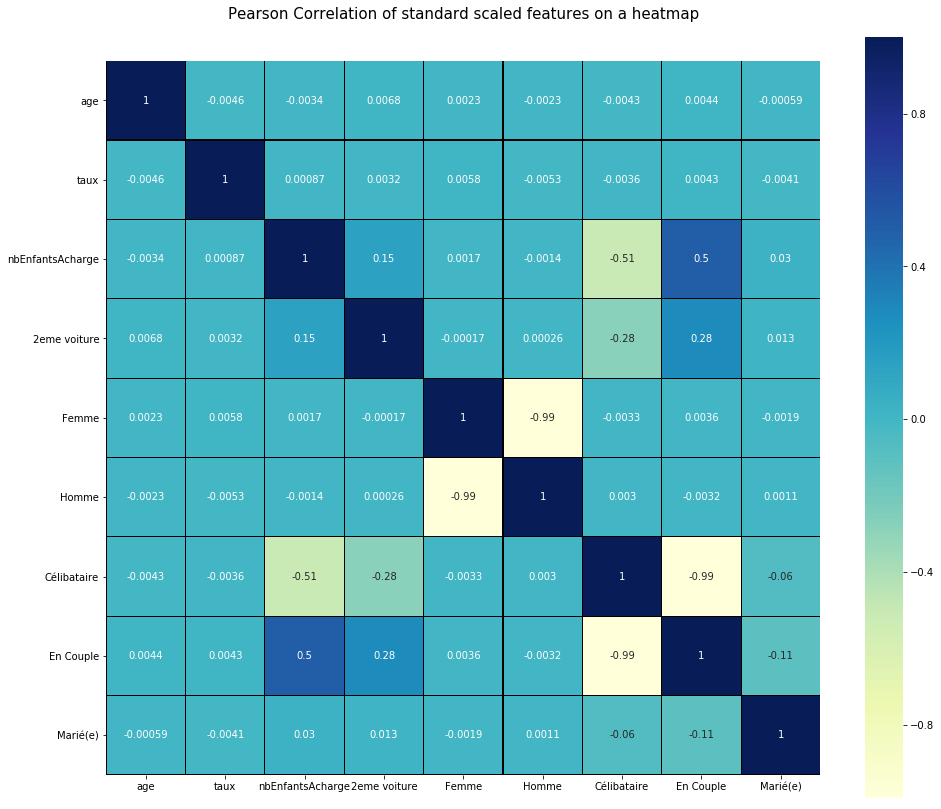

In [18]:
# Heatmap to see differents correlations between data
plt.figure(figsize=(16, 14))
plt.title('Pearson Correlation of standard scaled features on a heatmap', y=1.05, size=15)
sns.heatmap(df_clients.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='black', annot=True, cmap="YlGnBu")

In [19]:
df_clients.dtypes

age                   int64
taux                float64
nbEnfantsAcharge      int32
2eme voiture          int64
Femme                 uint8
Homme                 uint8
Célibataire           uint8
En Couple             uint8
Marié(e)              uint8
dtype: object

In [20]:
df_clients = pd.concat([df_clients, df_imma_copy], axis=1)
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e),immatriculation
0,44,476.0,0,0,0,1,0,1,0,3176 TS 67
1,20,422.0,2,0,0,1,0,1,0,3721 QS 49
2,49,221.0,0,0,1,0,1,0,0,9099 UV 26
3,57,246.0,0,0,0,1,1,0,0,3563 LA 55
4,58,1149.0,0,0,0,1,1,0,0,6963 AX 34


In [21]:
df_imma_cluster = pd.DataFrame(pd.read_csv('../input/immatriculation_and_cluster.csv', encoding="ISO-8859-1"))
df_imma_cluster.head()

,immatriculation,cluster_predicted
0,3176 TS 67,3
1,3721 QS 49,1
2,9099 UV 26,3
3,3563 LA 55,0
4,6963 AX 34,0


In [22]:
# ajout du cluster de leur véhicule
df_clients = df_clients.merge(df_imma_cluster, left_on="immatriculation", right_on="immatriculation", how="inner")
df_clients = df_clients.drop(['immatriculation'], axis=1)
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e),cluster_predicted
0,44,476.0,0,0,0,1,0,1,0,3
1,20,422.0,2,0,0,1,0,1,0,1
2,49,221.0,0,0,1,0,1,0,0,3
3,57,246.0,0,0,0,1,1,0,0,0
4,58,1149.0,0,0,0,1,1,0,0,0


In [23]:
# Application du nettoyage de la data sur le dataframe marketing

df_marketing['sexe'] = df_marketing['sexe'].replace(['M', 'Homme', 'Masculin'], "Homme")
df_marketing['sexe'] = df_marketing['sexe'].replace(['F', 'Féminin', 'Femme'], "Femme")
df_marketing['sexe'] = df_marketing['sexe'].replace(['?', 'N/D', ' '], np.nan)

dfSexeMarketing = pd.get_dummies(df_marketing['sexe'])
df_marketing = pd.concat([df_marketing, dfSexeMarketing], axis=1).drop(['sexe'] , axis=1)

df_marketing['situationFamiliale'] = df_marketing['situationFamiliale'].replace(['Célibataire', 'Seule', 'Seul', '?', ' ', 'Divorcée', 'N/D'], "Célibataire")

dfSituationFamillialeMarketing = pd.get_dummies(df_marketing['situationFamiliale'])
df_marketing = pd.concat([df_marketing, dfSituationFamillialeMarketing], axis=1).drop(['situationFamiliale'] , axis=1)

df_marketing['2eme voiture'] = df_marketing['2eme voiture'].replace(['true'], 1).astype(np.int64)
df_marketing['2eme voiture'] = df_marketing['2eme voiture'].replace(['false', ' ', '?'], 0).astype(np.int64)

df_marketing['nbEnfantsAcharge'] = df_marketing['nbEnfantsAcharge'].replace(['-1', ' ', '?'], '0').astype(int)

df_marketing['taux'] = df_marketing['taux'].replace([' ', '?', '-1'], meanTauxClients)
df_marketing['taux'] = df_marketing['taux'].astype(np.float64)

df_marketing['age'] = df_marketing['age'].replace([' ', '?', '-1'], meanAgeClients)
df_marketing['age'] = df_marketing['age'].astype(np.int64)

df_marketing['Marié(e)'] = 0
df_marketing['Marié(e)'] = df_marketing['Marié(e)'].astype(np.uint8)

df_marketing.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,21,1396.0,0,0,1,0,1,0,0
1,35,223.0,0,0,0,1,1,0,0
2,48,401.0,0,0,0,1,1,0,0
3,26,420.0,3,1,1,0,0,1,0
4,80,530.0,3,0,0,1,0,1,0


In [24]:
df_marketing.dtypes

age                   int64
taux                float64
nbEnfantsAcharge      int32
2eme voiture          int64
Femme                 uint8
Homme                 uint8
Célibataire           uint8
En Couple             uint8
Marié(e)              uint8
dtype: object

In [25]:
## On découpe notre df de train entre les datas

df_client_cluster_pred_copy = df_clients['cluster_predicted'].copy()
df_clients = df_clients.drop(['cluster_predicted'], axis=1)

column_save = df_clients.columns

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,0,1,0,1,0
1,20,422.0,2,0,0,1,0,1,0
2,49,221.0,0,0,1,0,1,0,0
3,57,246.0,0,0,0,1,1,0,0
4,58,1149.0,0,0,0,1,1,0,0


In [26]:
df_client_cluster_pred_copy.value_counts

<bound method IndexOpsMixin.value_counts of 0         3
1         1
2         3
3         0
4         0
5         4
6         3
7         0
8         0
9         0
10        0
11        4
12        0
13        1
14        3
15        4
16        4
17        2
18        0
19        3
20        2
21        4
22        3
23        3
24        3
25        2
26        2
27        0
28        0
29        2
         ..
100297    1
100298    3
100299    0
100300    3
100301    4
100302    0
100303    1
100304    4
100305    4
100306    1
100307    3
100308    3
100309    2
100310    3
100311    0
100312    0
100313    1
100314    3
100315    2
100316    3
100317    3
100318    0
100319    3
100320    0
100321    4
100322    2
100323    0
100324    0
100325    1
100326    0
Name: cluster_predicted, Length: 100327, dtype: int64>

In [27]:
## on normalise la data avant d'appliquer un algo dessus

from sklearn.preprocessing import StandardScaler

#mat_clients = df_clients.as_matrix()
#mat_marketing = df_marketing.as_matrix()

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(df_clients)

data_clients = scaler.transform(df_clients)
data_marketing = scaler.transform(df_marketing)

data_marketing

array([[-1.24647707,  2.35013892, -0.90019105, -0.38777247,  1.53664041,
        -1.52535656,  1.35236893, -1.3332099 , -0.08118961],
       [-0.47792315, -1.15594387, -0.90019105, -0.38777247, -0.65077034,
         0.65558442,  1.35236893, -1.3332099 , -0.08118961],
       [ 0.23573405, -0.62390403, -0.90019105, -0.38777247, -0.65077034,
         0.65558442,  1.35236893, -1.3332099 , -0.08118961],
       [-0.97199353, -0.56711326,  1.25749312,  2.57883184,  1.53664041,
        -1.52535656, -0.73944319,  0.75006944, -0.08118961],
       [ 1.9924287 , -0.23832459,  1.25749312, -0.38777247, -0.65077034,
         0.65558442, -0.73944319,  0.75006944, -0.08118961],
       [-0.91709682, -1.36517302,  0.53826507, -0.38777247,  1.53664041,
        -1.52535656, -0.73944319,  0.75006944, -0.08118961],
       [ 0.83959784, -0.1127871 ,  0.53826507, -0.38777247,  1.53664041,
        -1.52535656, -0.73944319,  0.75006944, -0.08118961],
       [-0.03874949, -0.53423439, -0.90019105, -0.38777247,  1

In [28]:
## on les remets en df panda pour taffer dessus

df_marketing_copy = df_marketing.copy()

df_clients   = pd.DataFrame(data_clients, columns=column_save)
df_marketing = pd.DataFrame(data_marketing, columns=column_save)

In [29]:
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,0.016147,-0.399730,-0.900191,-0.387772,-0.65077,0.655584,-0.739443,0.750069,-0.08119
1,-1.301374,-0.561135,0.538265,-0.387772,-0.65077,0.655584,-0.739443,0.750069,-0.08119
2,0.290631,-1.161922,-0.900191,-0.387772,1.53664,-1.525357,1.352369,-1.333210,-0.08119
3,0.729804,-1.087197,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119
4,0.784701,1.611859,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119


In [30]:
df_marketing.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,-1.246477,2.350139,-0.900191,-0.387772,1.53664,-1.525357,1.352369,-1.333210,-0.08119
1,-0.477923,-1.155944,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119
2,0.235734,-0.623904,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119
3,-0.971994,-0.567113,1.257493,2.578832,1.53664,-1.525357,-0.739443,0.750069,-0.08119
4,1.992429,-0.238325,1.257493,-0.387772,-0.65077,0.655584,-0.739443,0.750069,-0.08119


In [31]:
df_marketing.shape

(20, 9)

In [32]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# CatBoostClassifier function
def runCatBoostClassifier(x_train, y_train, x_test, depth):
    
    # init classification variable
    #classif_report = 0
    
    # init CatBoostClassifier
    model=CatBoostClassifier(iterations=4000,
                            learning_rate=0.02,
                            depth=depth 
                            ,loss_function="MultiClass",
                            #od_type="IncToDec",
                            #od_pval=1,
                            #od_wait=400
                            )
    
    # fit the model
    model.fit(x_train, y_train)
    # predit output
    y_test = model.predict(x_test)
    
    # build dataframe for classification report
    #y_pred = model.predict(x_train)
    
    # build classification report
    #classif_report = classification_report(y_train_cr, y_pred)
    
    return y_test

In [33]:
# run the catboostclassifier
marketing_cluster_pred = runCatBoostClassifier(df_clients, df_client_cluster_pred_copy, df_marketing, 8)

0:	learn: -1.5721214	total: 175ms	remaining: 11m 38s
1:	learn: -1.5374561	total: 292ms	remaining: 9m 44s
2:	learn: -1.5051069	total: 420ms	remaining: 9m 20s
3:	learn: -1.4748027	total: 537ms	remaining: 8m 56s
4:	learn: -1.4464788	total: 689ms	remaining: 9m 10s
5:	learn: -1.4196176	total: 818ms	remaining: 9m 4s
6:	learn: -1.3942342	total: 948ms	remaining: 9m
7:	learn: -1.3701935	total: 1.08s	remaining: 8m 58s
8:	learn: -1.3474930	total: 1.21s	remaining: 8m 56s
9:	learn: -1.3257934	total: 1.35s	remaining: 9m
10:	learn: -1.3051294	total: 1.49s	remaining: 9m 1s
11:	learn: -1.2855358	total: 1.63s	remaining: 9m
12:	learn: -1.2667087	total: 1.76s	remaining: 8m 59s
13:	learn: -1.2488134	total: 1.88s	remaining: 8m 55s
14:	learn: -1.2316809	total: 2.01s	remaining: 8m 54s
15:	learn: -1.2152613	total: 2.14s	remaining: 8m 53s
16:	learn: -1.1994681	total: 2.27s	remaining: 8m 53s
17:	learn: -1.1842385	total: 2.39s	remaining: 8m 48s
18:	learn: -1.1696632	total: 2.51s	remaining: 8m 46s
19:	learn: -1.15

156:	learn: -0.6916136	total: 19.5s	remaining: 7m 56s
157:	learn: -0.6911682	total: 19.6s	remaining: 7m 56s
158:	learn: -0.6907615	total: 19.7s	remaining: 7m 56s
159:	learn: -0.6904405	total: 19.8s	remaining: 7m 56s
160:	learn: -0.6900961	total: 20s	remaining: 7m 55s
161:	learn: -0.6896286	total: 20.1s	remaining: 7m 55s
162:	learn: -0.6892067	total: 20.2s	remaining: 7m 55s
163:	learn: -0.6888580	total: 20.3s	remaining: 7m 55s
164:	learn: -0.6885330	total: 20.5s	remaining: 7m 55s
165:	learn: -0.6881641	total: 20.6s	remaining: 7m 55s
166:	learn: -0.6877878	total: 20.7s	remaining: 7m 54s
167:	learn: -0.6874674	total: 20.8s	remaining: 7m 54s
168:	learn: -0.6871734	total: 20.9s	remaining: 7m 54s
169:	learn: -0.6868010	total: 21.1s	remaining: 7m 54s
170:	learn: -0.6865220	total: 21.2s	remaining: 7m 54s
171:	learn: -0.6861966	total: 21.3s	remaining: 7m 53s
172:	learn: -0.6858963	total: 21.4s	remaining: 7m 53s
173:	learn: -0.6856121	total: 21.5s	remaining: 7m 53s
174:	learn: -0.6853107	total: 

310:	learn: -0.6705578	total: 38.2s	remaining: 7m 32s
311:	learn: -0.6705262	total: 38.3s	remaining: 7m 32s
312:	learn: -0.6704813	total: 38.5s	remaining: 7m 33s
313:	learn: -0.6704504	total: 38.6s	remaining: 7m 33s
314:	learn: -0.6704156	total: 38.7s	remaining: 7m 32s
315:	learn: -0.6703807	total: 38.8s	remaining: 7m 32s
316:	learn: -0.6703333	total: 39s	remaining: 7m 33s
317:	learn: -0.6702522	total: 39.1s	remaining: 7m 33s
318:	learn: -0.6701941	total: 39.3s	remaining: 7m 33s
319:	learn: -0.6701372	total: 39.4s	remaining: 7m 33s
320:	learn: -0.6700896	total: 39.5s	remaining: 7m 33s
321:	learn: -0.6700325	total: 39.7s	remaining: 7m 33s
322:	learn: -0.6699818	total: 39.8s	remaining: 7m 32s
323:	learn: -0.6699358	total: 40s	remaining: 7m 33s
324:	learn: -0.6699064	total: 40.1s	remaining: 7m 33s
325:	learn: -0.6698645	total: 40.3s	remaining: 7m 33s
326:	learn: -0.6698207	total: 40.4s	remaining: 7m 33s
327:	learn: -0.6697810	total: 40.5s	remaining: 7m 33s
328:	learn: -0.6697355	total: 40

464:	learn: -0.6653426	total: 59.5s	remaining: 7m 32s
465:	learn: -0.6653002	total: 59.6s	remaining: 7m 32s
466:	learn: -0.6652678	total: 59.7s	remaining: 7m 31s
467:	learn: -0.6652390	total: 59.8s	remaining: 7m 31s
468:	learn: -0.6652071	total: 1m	remaining: 7m 31s
469:	learn: -0.6651767	total: 1m	remaining: 7m 31s
470:	learn: -0.6651543	total: 1m	remaining: 7m 32s
471:	learn: -0.6651335	total: 1m	remaining: 7m 32s
472:	learn: -0.6651069	total: 1m	remaining: 7m 32s
473:	learn: -0.6650866	total: 1m	remaining: 7m 31s
474:	learn: -0.6650652	total: 1m	remaining: 7m 31s
475:	learn: -0.6650410	total: 1m	remaining: 7m 31s
476:	learn: -0.6649932	total: 1m 1s	remaining: 7m 31s
477:	learn: -0.6649722	total: 1m 1s	remaining: 7m 31s
478:	learn: -0.6649597	total: 1m 1s	remaining: 7m 31s
479:	learn: -0.6649203	total: 1m 1s	remaining: 7m 31s
480:	learn: -0.6648896	total: 1m 1s	remaining: 7m 31s
481:	learn: -0.6648601	total: 1m 1s	remaining: 7m 31s
482:	learn: -0.6648385	total: 1m 1s	remaining: 7m 31

616:	learn: -0.6616977	total: 1m 19s	remaining: 7m 17s
617:	learn: -0.6616720	total: 1m 19s	remaining: 7m 17s
618:	learn: -0.6616524	total: 1m 20s	remaining: 7m 17s
619:	learn: -0.6616397	total: 1m 20s	remaining: 7m 16s
620:	learn: -0.6616078	total: 1m 20s	remaining: 7m 16s
621:	learn: -0.6615806	total: 1m 20s	remaining: 7m 16s
622:	learn: -0.6615552	total: 1m 20s	remaining: 7m 16s
623:	learn: -0.6615299	total: 1m 20s	remaining: 7m 16s
624:	learn: -0.6615008	total: 1m 20s	remaining: 7m 16s
625:	learn: -0.6614830	total: 1m 21s	remaining: 7m 16s
626:	learn: -0.6614596	total: 1m 21s	remaining: 7m 16s
627:	learn: -0.6614401	total: 1m 21s	remaining: 7m 16s
628:	learn: -0.6614271	total: 1m 21s	remaining: 7m 16s
629:	learn: -0.6614086	total: 1m 21s	remaining: 7m 16s
630:	learn: -0.6613892	total: 1m 21s	remaining: 7m 15s
631:	learn: -0.6613720	total: 1m 21s	remaining: 7m 15s
632:	learn: -0.6613553	total: 1m 21s	remaining: 7m 15s
633:	learn: -0.6613423	total: 1m 22s	remaining: 7m 15s
634:	learn

768:	learn: -0.6587610	total: 1m 39s	remaining: 6m 57s
769:	learn: -0.6587489	total: 1m 39s	remaining: 6m 57s
770:	learn: -0.6587257	total: 1m 39s	remaining: 6m 57s
771:	learn: -0.6587096	total: 1m 39s	remaining: 6m 57s
772:	learn: -0.6586889	total: 1m 39s	remaining: 6m 57s
773:	learn: -0.6586725	total: 1m 40s	remaining: 6m 57s
774:	learn: -0.6586553	total: 1m 40s	remaining: 6m 57s
775:	learn: -0.6586420	total: 1m 40s	remaining: 6m 57s
776:	learn: -0.6586187	total: 1m 40s	remaining: 6m 57s
777:	learn: -0.6586015	total: 1m 40s	remaining: 6m 57s
778:	learn: -0.6585861	total: 1m 40s	remaining: 6m 57s
779:	learn: -0.6585702	total: 1m 40s	remaining: 6m 56s
780:	learn: -0.6585538	total: 1m 41s	remaining: 6m 56s
781:	learn: -0.6585389	total: 1m 41s	remaining: 6m 56s
782:	learn: -0.6585245	total: 1m 41s	remaining: 6m 56s
783:	learn: -0.6585062	total: 1m 41s	remaining: 6m 56s
784:	learn: -0.6584907	total: 1m 41s	remaining: 6m 56s
785:	learn: -0.6584766	total: 1m 41s	remaining: 6m 56s
786:	learn

918:	learn: -0.6561895	total: 1m 59s	remaining: 6m 38s
919:	learn: -0.6561783	total: 1m 59s	remaining: 6m 38s
920:	learn: -0.6561684	total: 1m 59s	remaining: 6m 38s
921:	learn: -0.6561502	total: 1m 59s	remaining: 6m 38s
922:	learn: -0.6561282	total: 1m 59s	remaining: 6m 38s
923:	learn: -0.6561089	total: 1m 59s	remaining: 6m 38s
924:	learn: -0.6560937	total: 1m 59s	remaining: 6m 37s
925:	learn: -0.6560795	total: 1m 59s	remaining: 6m 37s
926:	learn: -0.6560602	total: 1m 59s	remaining: 6m 37s
927:	learn: -0.6560426	total: 2m	remaining: 6m 37s
928:	learn: -0.6560290	total: 2m	remaining: 6m 37s
929:	learn: -0.6560166	total: 2m	remaining: 6m 37s
930:	learn: -0.6560039	total: 2m	remaining: 6m 37s
931:	learn: -0.6559870	total: 2m	remaining: 6m 37s
932:	learn: -0.6559741	total: 2m	remaining: 6m 37s
933:	learn: -0.6559557	total: 2m	remaining: 6m 37s
934:	learn: -0.6559419	total: 2m 1s	remaining: 6m 36s
935:	learn: -0.6559300	total: 2m 1s	remaining: 6m 36s
936:	learn: -0.6559141	total: 2m 1s	rema

1069:	learn: -0.6538916	total: 2m 18s	remaining: 6m 19s
1070:	learn: -0.6538811	total: 2m 18s	remaining: 6m 19s
1071:	learn: -0.6538719	total: 2m 18s	remaining: 6m 19s
1072:	learn: -0.6538586	total: 2m 18s	remaining: 6m 19s
1073:	learn: -0.6538423	total: 2m 19s	remaining: 6m 18s
1074:	learn: -0.6538307	total: 2m 19s	remaining: 6m 18s
1075:	learn: -0.6538195	total: 2m 19s	remaining: 6m 18s
1076:	learn: -0.6538052	total: 2m 19s	remaining: 6m 18s
1077:	learn: -0.6537957	total: 2m 19s	remaining: 6m 18s
1078:	learn: -0.6537858	total: 2m 19s	remaining: 6m 18s
1079:	learn: -0.6537744	total: 2m 19s	remaining: 6m 17s
1080:	learn: -0.6537554	total: 2m 19s	remaining: 6m 17s
1081:	learn: -0.6537362	total: 2m 20s	remaining: 6m 17s
1082:	learn: -0.6537208	total: 2m 20s	remaining: 6m 17s
1083:	learn: -0.6537078	total: 2m 20s	remaining: 6m 17s
1084:	learn: -0.6536931	total: 2m 20s	remaining: 6m 17s
1085:	learn: -0.6536823	total: 2m 20s	remaining: 6m 16s
1086:	learn: -0.6536695	total: 2m 20s	remaining:

1219:	learn: -0.6517480	total: 2m 37s	remaining: 5m 59s
1220:	learn: -0.6517365	total: 2m 37s	remaining: 5m 59s
1221:	learn: -0.6517209	total: 2m 38s	remaining: 5m 59s
1222:	learn: -0.6517086	total: 2m 38s	remaining: 5m 59s
1223:	learn: -0.6516966	total: 2m 38s	remaining: 5m 59s
1224:	learn: -0.6516854	total: 2m 38s	remaining: 5m 58s
1225:	learn: -0.6516651	total: 2m 38s	remaining: 5m 58s
1226:	learn: -0.6516527	total: 2m 38s	remaining: 5m 58s
1227:	learn: -0.6516368	total: 2m 38s	remaining: 5m 58s
1228:	learn: -0.6516191	total: 2m 38s	remaining: 5m 58s
1229:	learn: -0.6516115	total: 2m 39s	remaining: 5m 58s
1230:	learn: -0.6515996	total: 2m 39s	remaining: 5m 58s
1231:	learn: -0.6515835	total: 2m 39s	remaining: 5m 57s
1232:	learn: -0.6515697	total: 2m 39s	remaining: 5m 57s
1233:	learn: -0.6515555	total: 2m 39s	remaining: 5m 57s
1234:	learn: -0.6515386	total: 2m 39s	remaining: 5m 57s
1235:	learn: -0.6515250	total: 2m 39s	remaining: 5m 57s
1236:	learn: -0.6515137	total: 2m 39s	remaining:

1367:	learn: -0.6497941	total: 2m 58s	remaining: 5m 42s
1368:	learn: -0.6497767	total: 2m 58s	remaining: 5m 42s
1369:	learn: -0.6497644	total: 2m 58s	remaining: 5m 42s
1370:	learn: -0.6497565	total: 2m 58s	remaining: 5m 42s
1371:	learn: -0.6497469	total: 2m 58s	remaining: 5m 42s
1372:	learn: -0.6497369	total: 2m 58s	remaining: 5m 42s
1373:	learn: -0.6497236	total: 2m 59s	remaining: 5m 42s
1374:	learn: -0.6497079	total: 2m 59s	remaining: 5m 42s
1375:	learn: -0.6496916	total: 2m 59s	remaining: 5m 41s
1376:	learn: -0.6496783	total: 2m 59s	remaining: 5m 41s
1377:	learn: -0.6496656	total: 2m 59s	remaining: 5m 41s
1378:	learn: -0.6496436	total: 2m 59s	remaining: 5m 41s
1379:	learn: -0.6496308	total: 2m 59s	remaining: 5m 41s
1380:	learn: -0.6496185	total: 3m	remaining: 5m 41s
1381:	learn: -0.6496049	total: 3m	remaining: 5m 41s
1382:	learn: -0.6495856	total: 3m	remaining: 5m 41s
1383:	learn: -0.6495648	total: 3m	remaining: 5m 41s
1384:	learn: -0.6495469	total: 3m	remaining: 5m 40s
1385:	learn:

1515:	learn: -0.6479101	total: 3m 19s	remaining: 5m 26s
1516:	learn: -0.6478975	total: 3m 19s	remaining: 5m 26s
1517:	learn: -0.6478885	total: 3m 19s	remaining: 5m 25s
1518:	learn: -0.6478743	total: 3m 19s	remaining: 5m 25s
1519:	learn: -0.6478581	total: 3m 19s	remaining: 5m 25s
1520:	learn: -0.6478356	total: 3m 19s	remaining: 5m 25s
1521:	learn: -0.6478273	total: 3m 19s	remaining: 5m 25s
1522:	learn: -0.6478165	total: 3m 19s	remaining: 5m 25s
1523:	learn: -0.6478001	total: 3m 20s	remaining: 5m 25s
1524:	learn: -0.6477924	total: 3m 20s	remaining: 5m 24s
1525:	learn: -0.6477806	total: 3m 20s	remaining: 5m 24s
1526:	learn: -0.6477715	total: 3m 20s	remaining: 5m 24s
1527:	learn: -0.6477596	total: 3m 20s	remaining: 5m 24s
1528:	learn: -0.6477388	total: 3m 20s	remaining: 5m 24s
1529:	learn: -0.6477261	total: 3m 20s	remaining: 5m 24s
1530:	learn: -0.6477073	total: 3m 21s	remaining: 5m 24s
1531:	learn: -0.6476941	total: 3m 21s	remaining: 5m 24s
1532:	learn: -0.6476758	total: 3m 21s	remaining:

1663:	learn: -0.6460908	total: 3m 38s	remaining: 5m 6s
1664:	learn: -0.6460814	total: 3m 38s	remaining: 5m 6s
1665:	learn: -0.6460742	total: 3m 38s	remaining: 5m 6s
1666:	learn: -0.6460614	total: 3m 38s	remaining: 5m 6s
1667:	learn: -0.6460456	total: 3m 39s	remaining: 5m 6s
1668:	learn: -0.6460290	total: 3m 39s	remaining: 5m 6s
1669:	learn: -0.6460196	total: 3m 39s	remaining: 5m 6s
1670:	learn: -0.6460101	total: 3m 39s	remaining: 5m 5s
1671:	learn: -0.6459943	total: 3m 39s	remaining: 5m 5s
1672:	learn: -0.6459821	total: 3m 39s	remaining: 5m 5s
1673:	learn: -0.6459730	total: 3m 39s	remaining: 5m 5s
1674:	learn: -0.6459650	total: 3m 39s	remaining: 5m 5s
1675:	learn: -0.6459544	total: 3m 40s	remaining: 5m 5s
1676:	learn: -0.6459400	total: 3m 40s	remaining: 5m 5s
1677:	learn: -0.6459193	total: 3m 40s	remaining: 5m 4s
1678:	learn: -0.6459045	total: 3m 40s	remaining: 5m 4s
1679:	learn: -0.6458923	total: 3m 40s	remaining: 5m 4s
1680:	learn: -0.6458805	total: 3m 40s	remaining: 5m 4s
1681:	lear

1812:	learn: -0.6443140	total: 3m 58s	remaining: 4m 47s
1813:	learn: -0.6443012	total: 3m 58s	remaining: 4m 47s
1814:	learn: -0.6442890	total: 3m 58s	remaining: 4m 47s
1815:	learn: -0.6442810	total: 3m 58s	remaining: 4m 47s
1816:	learn: -0.6442700	total: 3m 58s	remaining: 4m 46s
1817:	learn: -0.6442566	total: 3m 58s	remaining: 4m 46s
1818:	learn: -0.6442403	total: 3m 58s	remaining: 4m 46s
1819:	learn: -0.6442239	total: 3m 59s	remaining: 4m 46s
1820:	learn: -0.6442160	total: 3m 59s	remaining: 4m 46s
1821:	learn: -0.6442027	total: 3m 59s	remaining: 4m 46s
1822:	learn: -0.6441937	total: 3m 59s	remaining: 4m 46s
1823:	learn: -0.6441827	total: 3m 59s	remaining: 4m 45s
1824:	learn: -0.6441714	total: 3m 59s	remaining: 4m 45s
1825:	learn: -0.6441654	total: 3m 59s	remaining: 4m 45s
1826:	learn: -0.6441595	total: 3m 59s	remaining: 4m 45s
1827:	learn: -0.6441397	total: 4m	remaining: 4m 45s
1828:	learn: -0.6441339	total: 4m	remaining: 4m 45s
1829:	learn: -0.6441244	total: 4m	remaining: 4m 45s
1830

1962:	learn: -0.6426297	total: 4m 17s	remaining: 4m 26s
1963:	learn: -0.6426212	total: 4m 17s	remaining: 4m 26s
1964:	learn: -0.6426094	total: 4m 17s	remaining: 4m 26s
1965:	learn: -0.6426036	total: 4m 17s	remaining: 4m 26s
1966:	learn: -0.6425971	total: 4m 17s	remaining: 4m 26s
1967:	learn: -0.6425841	total: 4m 17s	remaining: 4m 26s
1968:	learn: -0.6425760	total: 4m 17s	remaining: 4m 25s
1969:	learn: -0.6425584	total: 4m 18s	remaining: 4m 25s
1970:	learn: -0.6425464	total: 4m 18s	remaining: 4m 25s
1971:	learn: -0.6425386	total: 4m 18s	remaining: 4m 25s
1972:	learn: -0.6425279	total: 4m 18s	remaining: 4m 25s
1973:	learn: -0.6425096	total: 4m 18s	remaining: 4m 25s
1974:	learn: -0.6424968	total: 4m 18s	remaining: 4m 25s
1975:	learn: -0.6424892	total: 4m 18s	remaining: 4m 25s
1976:	learn: -0.6424794	total: 4m 18s	remaining: 4m 24s
1977:	learn: -0.6424643	total: 4m 19s	remaining: 4m 24s
1978:	learn: -0.6424522	total: 4m 19s	remaining: 4m 24s
1979:	learn: -0.6424424	total: 4m 19s	remaining:

2110:	learn: -0.6410237	total: 4m 35s	remaining: 4m 6s
2111:	learn: -0.6410103	total: 4m 35s	remaining: 4m 6s
2112:	learn: -0.6410026	total: 4m 35s	remaining: 4m 6s
2113:	learn: -0.6409915	total: 4m 36s	remaining: 4m 6s
2114:	learn: -0.6409823	total: 4m 36s	remaining: 4m 6s
2115:	learn: -0.6409687	total: 4m 36s	remaining: 4m 6s
2116:	learn: -0.6409622	total: 4m 36s	remaining: 4m 5s
2117:	learn: -0.6409525	total: 4m 36s	remaining: 4m 5s
2118:	learn: -0.6409456	total: 4m 36s	remaining: 4m 5s
2119:	learn: -0.6409336	total: 4m 36s	remaining: 4m 5s
2120:	learn: -0.6409175	total: 4m 36s	remaining: 4m 5s
2121:	learn: -0.6409059	total: 4m 37s	remaining: 4m 5s
2122:	learn: -0.6408998	total: 4m 37s	remaining: 4m 5s
2123:	learn: -0.6408952	total: 4m 37s	remaining: 4m 4s
2124:	learn: -0.6408847	total: 4m 37s	remaining: 4m 4s
2125:	learn: -0.6408763	total: 4m 37s	remaining: 4m 4s
2126:	learn: -0.6408674	total: 4m 37s	remaining: 4m 4s
2127:	learn: -0.6408578	total: 4m 37s	remaining: 4m 4s
2128:	lear

2258:	learn: -0.6394501	total: 4m 54s	remaining: 3m 46s
2259:	learn: -0.6394401	total: 4m 54s	remaining: 3m 46s
2260:	learn: -0.6394346	total: 4m 54s	remaining: 3m 46s
2261:	learn: -0.6394225	total: 4m 54s	remaining: 3m 46s
2262:	learn: -0.6394084	total: 4m 54s	remaining: 3m 46s
2263:	learn: -0.6394017	total: 4m 55s	remaining: 3m 46s
2264:	learn: -0.6393853	total: 4m 55s	remaining: 3m 46s
2265:	learn: -0.6393731	total: 4m 55s	remaining: 3m 45s
2266:	learn: -0.6393676	total: 4m 55s	remaining: 3m 45s
2267:	learn: -0.6393615	total: 4m 55s	remaining: 3m 45s
2268:	learn: -0.6393498	total: 4m 55s	remaining: 3m 45s
2269:	learn: -0.6393348	total: 4m 55s	remaining: 3m 45s
2270:	learn: -0.6393188	total: 4m 55s	remaining: 3m 45s
2271:	learn: -0.6393091	total: 4m 56s	remaining: 3m 45s
2272:	learn: -0.6393027	total: 4m 56s	remaining: 3m 45s
2273:	learn: -0.6392908	total: 4m 56s	remaining: 3m 44s
2274:	learn: -0.6392830	total: 4m 56s	remaining: 3m 44s
2275:	learn: -0.6392698	total: 4m 56s	remaining:

2408:	learn: -0.6379432	total: 5m 12s	remaining: 3m 26s
2409:	learn: -0.6379377	total: 5m 13s	remaining: 3m 26s
2410:	learn: -0.6379200	total: 5m 13s	remaining: 3m 26s
2411:	learn: -0.6379111	total: 5m 13s	remaining: 3m 26s
2412:	learn: -0.6379023	total: 5m 13s	remaining: 3m 26s
2413:	learn: -0.6378936	total: 5m 13s	remaining: 3m 25s
2414:	learn: -0.6378821	total: 5m 13s	remaining: 3m 25s
2415:	learn: -0.6378729	total: 5m 13s	remaining: 3m 25s
2416:	learn: -0.6378625	total: 5m 13s	remaining: 3m 25s
2417:	learn: -0.6378539	total: 5m 13s	remaining: 3m 25s
2418:	learn: -0.6378442	total: 5m 14s	remaining: 3m 25s
2419:	learn: -0.6378364	total: 5m 14s	remaining: 3m 25s
2420:	learn: -0.6378251	total: 5m 14s	remaining: 3m 24s
2421:	learn: -0.6378151	total: 5m 14s	remaining: 3m 24s
2422:	learn: -0.6378052	total: 5m 14s	remaining: 3m 24s
2423:	learn: -0.6377911	total: 5m 14s	remaining: 3m 24s
2424:	learn: -0.6377833	total: 5m 14s	remaining: 3m 24s
2425:	learn: -0.6377741	total: 5m 14s	remaining:

2556:	learn: -0.6365180	total: 5m 31s	remaining: 3m 6s
2557:	learn: -0.6365015	total: 5m 31s	remaining: 3m 6s
2558:	learn: -0.6364942	total: 5m 31s	remaining: 3m 6s
2559:	learn: -0.6364823	total: 5m 31s	remaining: 3m 6s
2560:	learn: -0.6364757	total: 5m 31s	remaining: 3m 6s
2561:	learn: -0.6364671	total: 5m 31s	remaining: 3m 6s
2562:	learn: -0.6364573	total: 5m 31s	remaining: 3m 6s
2563:	learn: -0.6364505	total: 5m 32s	remaining: 3m 6s
2564:	learn: -0.6364449	total: 5m 32s	remaining: 3m 5s
2565:	learn: -0.6364375	total: 5m 32s	remaining: 3m 5s
2566:	learn: -0.6364265	total: 5m 32s	remaining: 3m 5s
2567:	learn: -0.6364203	total: 5m 32s	remaining: 3m 5s
2568:	learn: -0.6364110	total: 5m 32s	remaining: 3m 5s
2569:	learn: -0.6363995	total: 5m 32s	remaining: 3m 5s
2570:	learn: -0.6363927	total: 5m 33s	remaining: 3m 5s
2571:	learn: -0.6363852	total: 5m 33s	remaining: 3m 5s
2572:	learn: -0.6363746	total: 5m 33s	remaining: 3m 4s
2573:	learn: -0.6363643	total: 5m 33s	remaining: 3m 4s
2574:	lear

2705:	learn: -0.6351311	total: 5m 51s	remaining: 2m 48s
2706:	learn: -0.6351184	total: 5m 51s	remaining: 2m 47s
2707:	learn: -0.6351040	total: 5m 51s	remaining: 2m 47s
2708:	learn: -0.6350948	total: 5m 51s	remaining: 2m 47s
2709:	learn: -0.6350795	total: 5m 52s	remaining: 2m 47s
2710:	learn: -0.6350732	total: 5m 52s	remaining: 2m 47s
2711:	learn: -0.6350662	total: 5m 52s	remaining: 2m 47s
2712:	learn: -0.6350609	total: 5m 52s	remaining: 2m 47s
2713:	learn: -0.6350449	total: 5m 52s	remaining: 2m 47s
2714:	learn: -0.6350341	total: 5m 52s	remaining: 2m 46s
2715:	learn: -0.6350248	total: 5m 52s	remaining: 2m 46s
2716:	learn: -0.6350144	total: 5m 52s	remaining: 2m 46s
2717:	learn: -0.6350037	total: 5m 53s	remaining: 2m 46s
2718:	learn: -0.6349945	total: 5m 53s	remaining: 2m 46s
2719:	learn: -0.6349868	total: 5m 53s	remaining: 2m 46s
2720:	learn: -0.6349799	total: 5m 53s	remaining: 2m 46s
2721:	learn: -0.6349746	total: 5m 53s	remaining: 2m 46s
2722:	learn: -0.6349691	total: 5m 53s	remaining:

2854:	learn: -0.6337163	total: 6m 11s	remaining: 2m 29s
2855:	learn: -0.6337066	total: 6m 11s	remaining: 2m 28s
2856:	learn: -0.6337002	total: 6m 11s	remaining: 2m 28s
2857:	learn: -0.6336854	total: 6m 12s	remaining: 2m 28s
2858:	learn: -0.6336762	total: 6m 12s	remaining: 2m 28s
2859:	learn: -0.6336676	total: 6m 12s	remaining: 2m 28s
2860:	learn: -0.6336618	total: 6m 12s	remaining: 2m 28s
2861:	learn: -0.6336511	total: 6m 12s	remaining: 2m 28s
2862:	learn: -0.6336406	total: 6m 12s	remaining: 2m 28s
2863:	learn: -0.6336332	total: 6m 12s	remaining: 2m 27s
2864:	learn: -0.6336202	total: 6m 12s	remaining: 2m 27s
2865:	learn: -0.6336129	total: 6m 13s	remaining: 2m 27s
2866:	learn: -0.6335970	total: 6m 13s	remaining: 2m 27s
2867:	learn: -0.6335903	total: 6m 13s	remaining: 2m 27s
2868:	learn: -0.6335711	total: 6m 13s	remaining: 2m 27s
2869:	learn: -0.6335607	total: 6m 13s	remaining: 2m 27s
2870:	learn: -0.6335544	total: 6m 13s	remaining: 2m 26s
2871:	learn: -0.6335485	total: 6m 13s	remaining:

3002:	learn: -0.6323506	total: 6m 30s	remaining: 2m 9s
3003:	learn: -0.6323411	total: 6m 30s	remaining: 2m 9s
3004:	learn: -0.6323322	total: 6m 30s	remaining: 2m 9s
3005:	learn: -0.6323203	total: 6m 30s	remaining: 2m 9s
3006:	learn: -0.6323147	total: 6m 30s	remaining: 2m 9s
3007:	learn: -0.6323080	total: 6m 31s	remaining: 2m 8s
3008:	learn: -0.6322985	total: 6m 31s	remaining: 2m 8s
3009:	learn: -0.6322921	total: 6m 31s	remaining: 2m 8s
3010:	learn: -0.6322859	total: 6m 31s	remaining: 2m 8s
3011:	learn: -0.6322788	total: 6m 31s	remaining: 2m 8s
3012:	learn: -0.6322683	total: 6m 31s	remaining: 2m 8s
3013:	learn: -0.6322606	total: 6m 31s	remaining: 2m 8s
3014:	learn: -0.6322514	total: 6m 31s	remaining: 2m 8s
3015:	learn: -0.6322350	total: 6m 32s	remaining: 2m 7s
3016:	learn: -0.6322227	total: 6m 32s	remaining: 2m 7s
3017:	learn: -0.6322145	total: 6m 32s	remaining: 2m 7s
3018:	learn: -0.6322035	total: 6m 32s	remaining: 2m 7s
3019:	learn: -0.6321954	total: 6m 32s	remaining: 2m 7s
3020:	lear

3152:	learn: -0.6310590	total: 6m 49s	remaining: 1m 50s
3153:	learn: -0.6310529	total: 6m 49s	remaining: 1m 49s
3154:	learn: -0.6310444	total: 6m 49s	remaining: 1m 49s
3155:	learn: -0.6310369	total: 6m 50s	remaining: 1m 49s
3156:	learn: -0.6310303	total: 6m 50s	remaining: 1m 49s
3157:	learn: -0.6310239	total: 6m 50s	remaining: 1m 49s
3158:	learn: -0.6310191	total: 6m 50s	remaining: 1m 49s
3159:	learn: -0.6310120	total: 6m 50s	remaining: 1m 49s
3160:	learn: -0.6309997	total: 6m 50s	remaining: 1m 49s
3161:	learn: -0.6309877	total: 6m 50s	remaining: 1m 48s
3162:	learn: -0.6309772	total: 6m 51s	remaining: 1m 48s
3163:	learn: -0.6309730	total: 6m 51s	remaining: 1m 48s
3164:	learn: -0.6309583	total: 6m 51s	remaining: 1m 48s
3165:	learn: -0.6309476	total: 6m 51s	remaining: 1m 48s
3166:	learn: -0.6309409	total: 6m 51s	remaining: 1m 48s
3167:	learn: -0.6309354	total: 6m 51s	remaining: 1m 48s
3168:	learn: -0.6309267	total: 6m 51s	remaining: 1m 47s
3169:	learn: -0.6309123	total: 6m 51s	remaining:

3300:	learn: -0.6298494	total: 7m 9s	remaining: 1m 31s
3301:	learn: -0.6298422	total: 7m 10s	remaining: 1m 30s
3302:	learn: -0.6298352	total: 7m 10s	remaining: 1m 30s
3303:	learn: -0.6298279	total: 7m 10s	remaining: 1m 30s
3304:	learn: -0.6298199	total: 7m 10s	remaining: 1m 30s
3305:	learn: -0.6298057	total: 7m 10s	remaining: 1m 30s
3306:	learn: -0.6297918	total: 7m 10s	remaining: 1m 30s
3307:	learn: -0.6297825	total: 7m 10s	remaining: 1m 30s
3308:	learn: -0.6297726	total: 7m 11s	remaining: 1m 30s
3309:	learn: -0.6297657	total: 7m 11s	remaining: 1m 29s
3310:	learn: -0.6297595	total: 7m 11s	remaining: 1m 29s
3311:	learn: -0.6297511	total: 7m 11s	remaining: 1m 29s
3312:	learn: -0.6297460	total: 7m 11s	remaining: 1m 29s
3313:	learn: -0.6297377	total: 7m 11s	remaining: 1m 29s
3314:	learn: -0.6297290	total: 7m 11s	remaining: 1m 29s
3315:	learn: -0.6297200	total: 7m 11s	remaining: 1m 29s
3316:	learn: -0.6297092	total: 7m 12s	remaining: 1m 28s
3317:	learn: -0.6297000	total: 7m 12s	remaining: 

3448:	learn: -0.6286527	total: 7m 29s	remaining: 1m 11s
3449:	learn: -0.6286437	total: 7m 29s	remaining: 1m 11s
3450:	learn: -0.6286394	total: 7m 29s	remaining: 1m 11s
3451:	learn: -0.6286286	total: 7m 29s	remaining: 1m 11s
3452:	learn: -0.6286145	total: 7m 29s	remaining: 1m 11s
3453:	learn: -0.6286051	total: 7m 29s	remaining: 1m 11s
3454:	learn: -0.6286001	total: 7m 29s	remaining: 1m 10s
3455:	learn: -0.6285956	total: 7m 30s	remaining: 1m 10s
3456:	learn: -0.6285905	total: 7m 30s	remaining: 1m 10s
3457:	learn: -0.6285804	total: 7m 30s	remaining: 1m 10s
3458:	learn: -0.6285643	total: 7m 30s	remaining: 1m 10s
3459:	learn: -0.6285532	total: 7m 30s	remaining: 1m 10s
3460:	learn: -0.6285482	total: 7m 30s	remaining: 1m 10s
3461:	learn: -0.6285433	total: 7m 30s	remaining: 1m 10s
3462:	learn: -0.6285370	total: 7m 30s	remaining: 1m 9s
3463:	learn: -0.6285261	total: 7m 31s	remaining: 1m 9s
3464:	learn: -0.6285135	total: 7m 31s	remaining: 1m 9s
3465:	learn: -0.6285076	total: 7m 31s	remaining: 1m

3598:	learn: -0.6274133	total: 7m 47s	remaining: 52.1s
3599:	learn: -0.6273973	total: 7m 48s	remaining: 52s
3600:	learn: -0.6273843	total: 7m 48s	remaining: 51.9s
3601:	learn: -0.6273782	total: 7m 48s	remaining: 51.7s
3602:	learn: -0.6273723	total: 7m 48s	remaining: 51.6s
3603:	learn: -0.6273663	total: 7m 48s	remaining: 51.5s
3604:	learn: -0.6273593	total: 7m 48s	remaining: 51.4s
3605:	learn: -0.6273522	total: 7m 48s	remaining: 51.2s
3606:	learn: -0.6273479	total: 7m 48s	remaining: 51.1s
3607:	learn: -0.6273431	total: 7m 49s	remaining: 51s
3608:	learn: -0.6273367	total: 7m 49s	remaining: 50.8s
3609:	learn: -0.6273289	total: 7m 49s	remaining: 50.7s
3610:	learn: -0.6273224	total: 7m 49s	remaining: 50.6s
3611:	learn: -0.6273109	total: 7m 49s	remaining: 50.4s
3612:	learn: -0.6273037	total: 7m 49s	remaining: 50.3s
3613:	learn: -0.6272911	total: 7m 49s	remaining: 50.2s
3614:	learn: -0.6272822	total: 7m 49s	remaining: 50s
3615:	learn: -0.6272706	total: 7m 50s	remaining: 49.9s
3616:	learn: -0.

3750:	learn: -0.6261516	total: 8m 6s	remaining: 32.3s
3751:	learn: -0.6261431	total: 8m 6s	remaining: 32.2s
3752:	learn: -0.6261378	total: 8m 7s	remaining: 32.1s
3753:	learn: -0.6261306	total: 8m 7s	remaining: 31.9s
3754:	learn: -0.6261249	total: 8m 7s	remaining: 31.8s
3755:	learn: -0.6261199	total: 8m 7s	remaining: 31.7s
3756:	learn: -0.6261123	total: 8m 7s	remaining: 31.5s
3757:	learn: -0.6261074	total: 8m 7s	remaining: 31.4s
3758:	learn: -0.6261022	total: 8m 7s	remaining: 31.3s
3759:	learn: -0.6260955	total: 8m 8s	remaining: 31.1s
3760:	learn: -0.6260907	total: 8m 8s	remaining: 31s
3761:	learn: -0.6260852	total: 8m 8s	remaining: 30.9s
3762:	learn: -0.6260748	total: 8m 8s	remaining: 30.8s
3763:	learn: -0.6260682	total: 8m 8s	remaining: 30.6s
3764:	learn: -0.6260590	total: 8m 8s	remaining: 30.5s
3765:	learn: -0.6260475	total: 8m 8s	remaining: 30.4s
3766:	learn: -0.6260420	total: 8m 8s	remaining: 30.2s
3767:	learn: -0.6260363	total: 8m 9s	remaining: 30.1s
3768:	learn: -0.6260308	total:

3900:	learn: -0.6249988	total: 8m 25s	remaining: 12.8s
3901:	learn: -0.6249950	total: 8m 25s	remaining: 12.7s
3902:	learn: -0.6249843	total: 8m 25s	remaining: 12.6s
3903:	learn: -0.6249770	total: 8m 25s	remaining: 12.4s
3904:	learn: -0.6249683	total: 8m 25s	remaining: 12.3s
3905:	learn: -0.6249617	total: 8m 25s	remaining: 12.2s
3906:	learn: -0.6249555	total: 8m 25s	remaining: 12s
3907:	learn: -0.6249482	total: 8m 26s	remaining: 11.9s
3908:	learn: -0.6249393	total: 8m 26s	remaining: 11.8s
3909:	learn: -0.6249346	total: 8m 26s	remaining: 11.7s
3910:	learn: -0.6249273	total: 8m 26s	remaining: 11.5s
3911:	learn: -0.6249203	total: 8m 26s	remaining: 11.4s
3912:	learn: -0.6249127	total: 8m 26s	remaining: 11.3s
3913:	learn: -0.6249061	total: 8m 26s	remaining: 11.1s
3914:	learn: -0.6248927	total: 8m 26s	remaining: 11s
3915:	learn: -0.6248864	total: 8m 27s	remaining: 10.9s
3916:	learn: -0.6248796	total: 8m 27s	remaining: 10.7s
3917:	learn: -0.6248705	total: 8m 27s	remaining: 10.6s
3918:	learn: -

In [34]:
marketing_cluster_pred = pd.DataFrame(marketing_cluster_pred).astype(int)

In [35]:
marketing_cluster_pred = marketing_cluster_pred.rename(columns={0: "cluster"})
marketing_cluster_pred.head()

,cluster
0,0
1,3
2,0
3,1
4,2


In [36]:
df_marketing_pred = pd.concat([df_marketing_copy, marketing_cluster_pred], axis=1)
df_marketing_pred.head(10)

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e),cluster
0,21,1396.0,0,0,1,0,1,0,0,0
1,35,223.0,0,0,0,1,1,0,0,3
2,48,401.0,0,0,0,1,1,0,0,0
3,26,420.0,3,1,1,0,0,1,0,1
4,80,530.0,3,0,0,1,0,1,0,2
5,27,153.0,2,0,1,0,0,1,0,3
6,59,572.0,2,0,1,0,0,1,0,3
7,43,431.0,0,0,1,0,1,0,0,3
8,64,559.0,0,0,0,1,1,0,0,0
9,22,154.0,1,0,0,1,0,1,0,3


In [37]:
df_imma_cluster.head()

,immatriculation,cluster_predicted
0,3176 TS 67,3
1,3721 QS 49,1
2,9099 UV 26,3
3,3563 LA 55,0
4,6963 AX 34,0


In [38]:
import random

def fonc(clust):
    print(clust) 
    
    # On récupère les lignes correspondant au cluster recherchés
    imma_cluster_needed = df_imma_cluster.loc[df_imma_cluster['cluster_predicted'] == clust]
    
    # On prend un random entre 0 et le total
    number_random = random.randint(0,len(imma_cluster_needed))
    
    return imma_cluster_needed['immatriculation'].iloc[number_random]
    

In [39]:
df_marketing_pred['imma_choisi'] = df_marketing_pred['cluster'].apply(lambda clust : fonc(clust))
df_marketing_pred['imma_choisi']

0
3
0
1
2
3
3
3
0
3
3
3
3
4
0
1
4
1
3
0


0     3642 VD 36
1     9696 XQ 62
2     5156 UT 65
3     5925 UE 11
4     4209 HL 10
5      369 RP 35
6     4024 QY 13
7     8286 ZL 28
8     2975 VB 13
9     3021 JH 58
10    9738 YU 24
11    7628 SP 24
12    2677 NZ 32
13    8246 SQ 13
14    3679 NK 62
15    7958 LL 72
16    6398 KR 37
17    1805 UP 63
18    1202 VT 15
19     595 EC 73
Name: imma_choisi, dtype: object

In [40]:
df_marketing_pred.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e),cluster,imma_choisi
0,21,1396.0,0,0,1,0,1,0,0,0,3642 VD 36
1,35,223.0,0,0,0,1,1,0,0,3,9696 XQ 62
2,48,401.0,0,0,0,1,1,0,0,0,5156 UT 65
3,26,420.0,3,1,1,0,0,1,0,1,5925 UE 11
4,80,530.0,3,0,0,1,0,1,0,2,4209 HL 10


In [42]:
df_marketing_pred.to_csv('../input/LE_FINAL_MONSIEUR.csv', index=False)